# Mini Project 3

**2025 Introduction to Quantiative Methods in Finance**

**The Erdös Institute**

The code below provides a visual representation of how the Black-Scholes **call option** price changes with respect to time.

**a)** Use the visualization to interpret how the *rate of change* of the Black-Scholes call option price behaves as time progresses.

**b)** Create a separate graphic to visualize how the *rate of change* of the Black-Scholes call option price depends on the spot price $S(0)$.

**c)** Repeat parts **a** and **b** for **put option** prices.

**d)** Use the space below to record your observations and reflections based on the generated plots.

---

### Observations:

- *Call Option – Time Sensitivity:*  
- *Call Option – Spot Price Sensitivity:*  
- *Put Option – Time Sensitivity:*  
- *Put Option – Spot Price Sensitivity:*  

## Import libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
import seaborn as sns
sns.set_style('darkgrid')

## Define Functions

In [3]:
def bs_call(S0, K, sigma, t=1, r=0):
    """
    Description:
    
    Computes the Black-Scholes value of a European call option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Call option price
    """
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return S0*norm.cdf(d1)-K*np.exp(-r*t)*norm.cdf(d2)


def bs_put(S0, K, sigma, t=1, r=0):
    """
    Description:
    
    Computes the Black-Scholes value of a European put option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Put option price
    """
    
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return -S0*norm.cdf(-d1)+K*np.exp(-r*t)*norm.cdf(-d2)

## Plot Call and Put prices

Below I plot the Black-Scholes Call and Put option prices for varying time of expiration and spot prices. Further comments on this are found in the final section.

C:\Users\ntamm\AppData\Local\Temp\ipykernel_27612\3182136271.py:17: RuntimeWarning: divide by zero encountered in log
  d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
C:\Users\ntamm\AppData\Local\Temp\ipykernel_27612\3182136271.py:40: RuntimeWarning: divide by zero encountered in log
  d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))


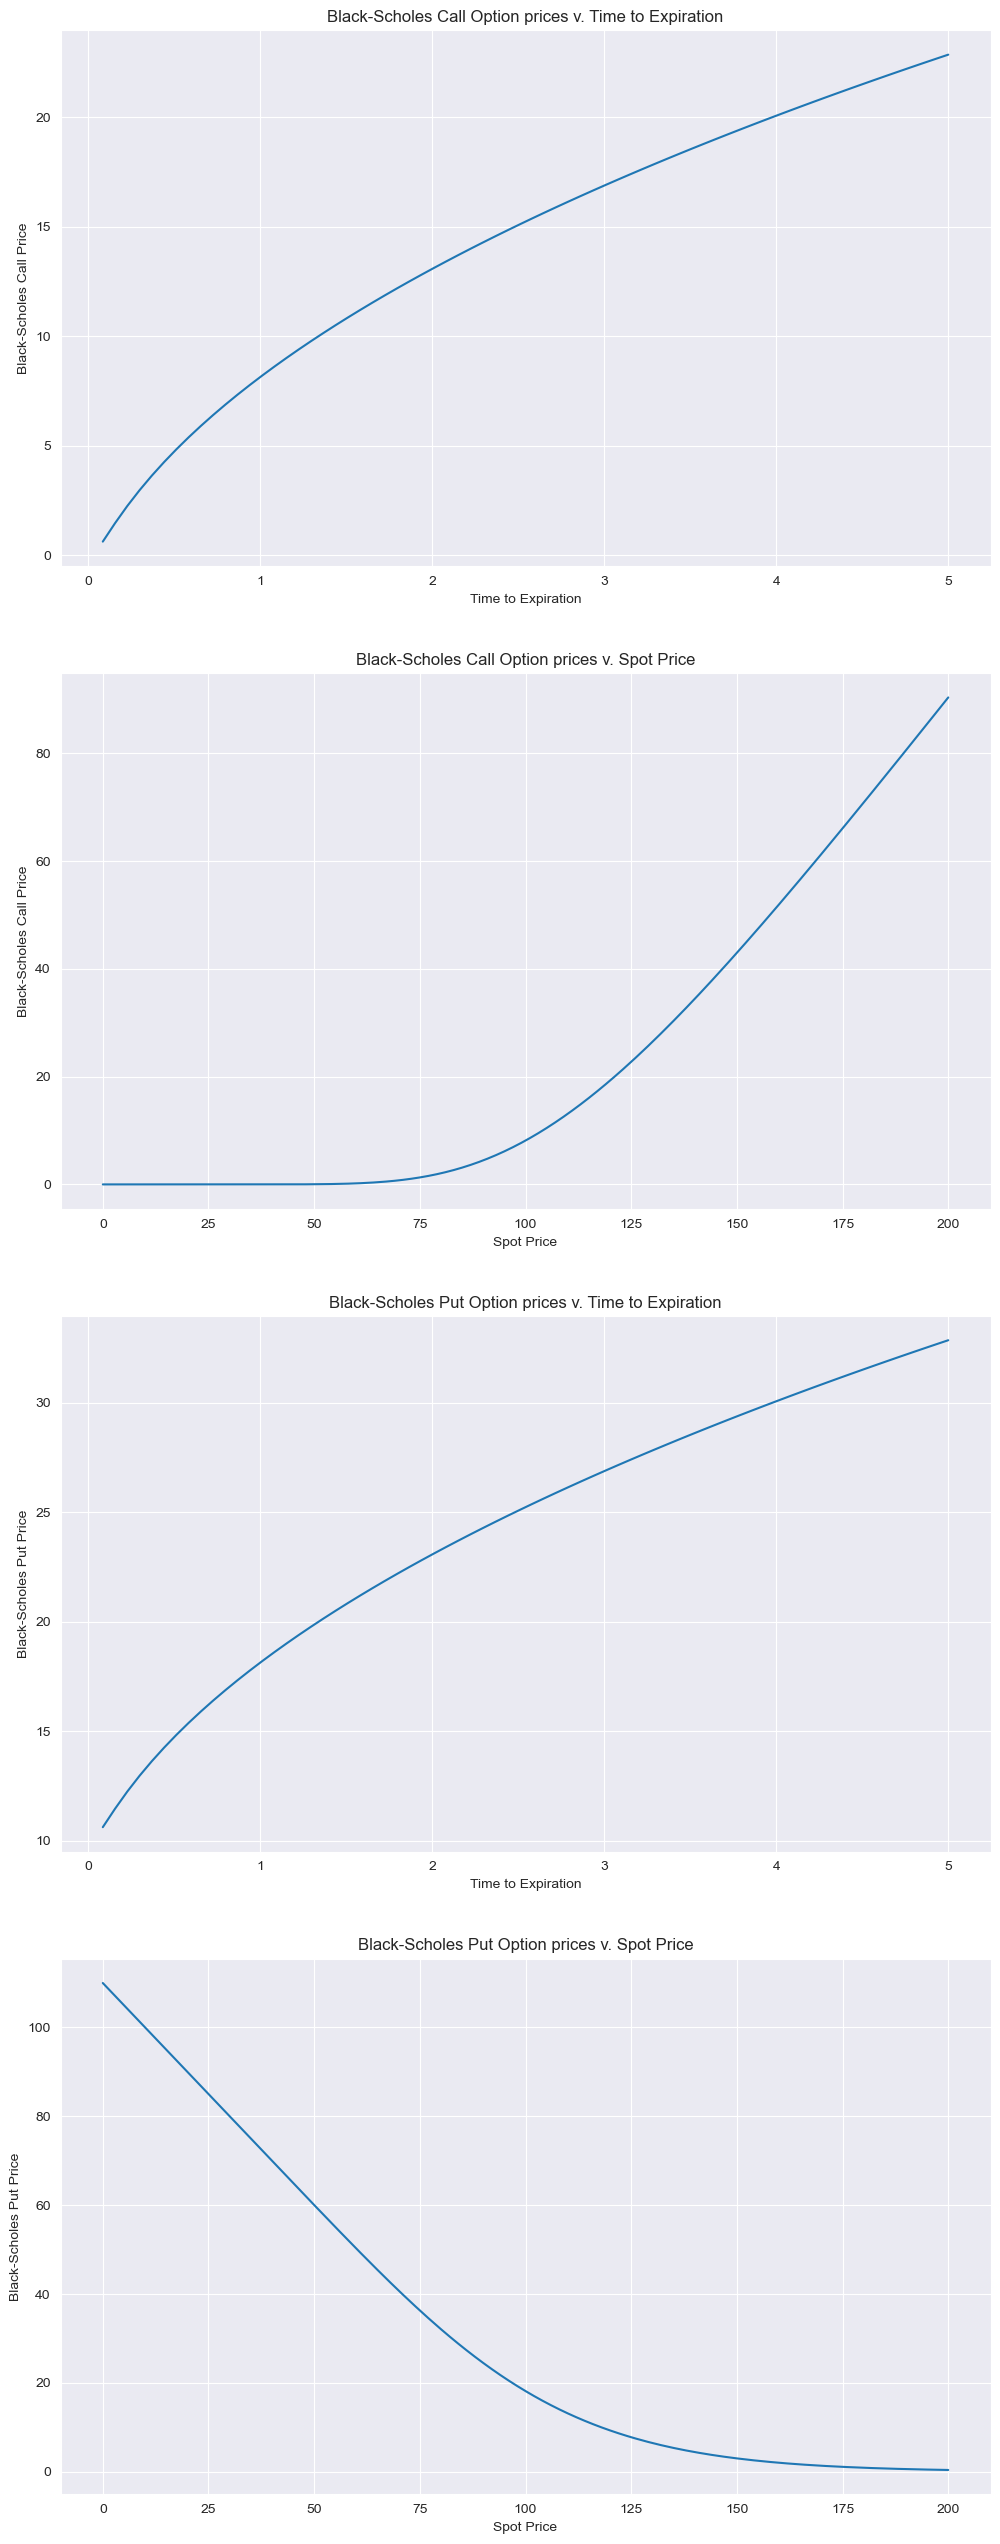

In [36]:
S0 = 100
S0s = np.linspace(0, 200, 201)
K = 110
sigma = .3
times = np.linspace(1/12, 5, 70)
time = 1

call_prices_t = [bs_call(S0,K,sigma, t = times[i]) for i in range(len(times))]
call_prices_s = [bs_call(S0=S0s[i],K=K,sigma=sigma,t=time) for i in range(len(S0s))]
put_prices_t = [bs_put(S0,K,sigma, t = times[i]) for i in range(len(times))]
put_prices_s = [bs_put(S0=S0s[i],K=K,sigma=sigma,t=time) for i in range(len(S0s))]


fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(12, 32))

ax[0].set_title('Black-Scholes Call Option prices v. Time to Expiration')
ax[0].plot(times, call_prices_t)
ax[0].set_ylabel('Black-Scholes Call Price')
ax[0].set_xlabel('Time to Expiration')

ax[1].set_title('Black-Scholes Call Option prices v. Spot Price')
ax[1].plot(S0s, call_prices_s)
ax[1].set_ylabel('Black-Scholes Call Price')
ax[1].set_xlabel('Spot Price')

ax[2].set_title('Black-Scholes Put Option prices v. Time to Expiration')
ax[2].plot(times, put_prices_t)
ax[2].set_ylabel('Black-Scholes Put Price')
ax[2].set_xlabel('Time to Expiration')

ax[3].set_title('Black-Scholes Put Option prices v. Spot Price')
ax[3].plot(S0s, put_prices_s)
ax[3].set_ylabel('Black-Scholes Put Price')
ax[3].set_xlabel('Spot Price')

plt.show()

## Call and Put price Rate of Change

Below I plot the rate of change of the Black-Scholes Call and Put option prices with respect to varying time to expriration and spot prices. Further comments on this are found below.

C:\Users\ntamm\AppData\Local\Temp\ipykernel_27612\3182136271.py:17: RuntimeWarning: divide by zero encountered in log
  d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
C:\Users\ntamm\AppData\Local\Temp\ipykernel_27612\3182136271.py:40: RuntimeWarning: divide by zero encountered in log
  d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))


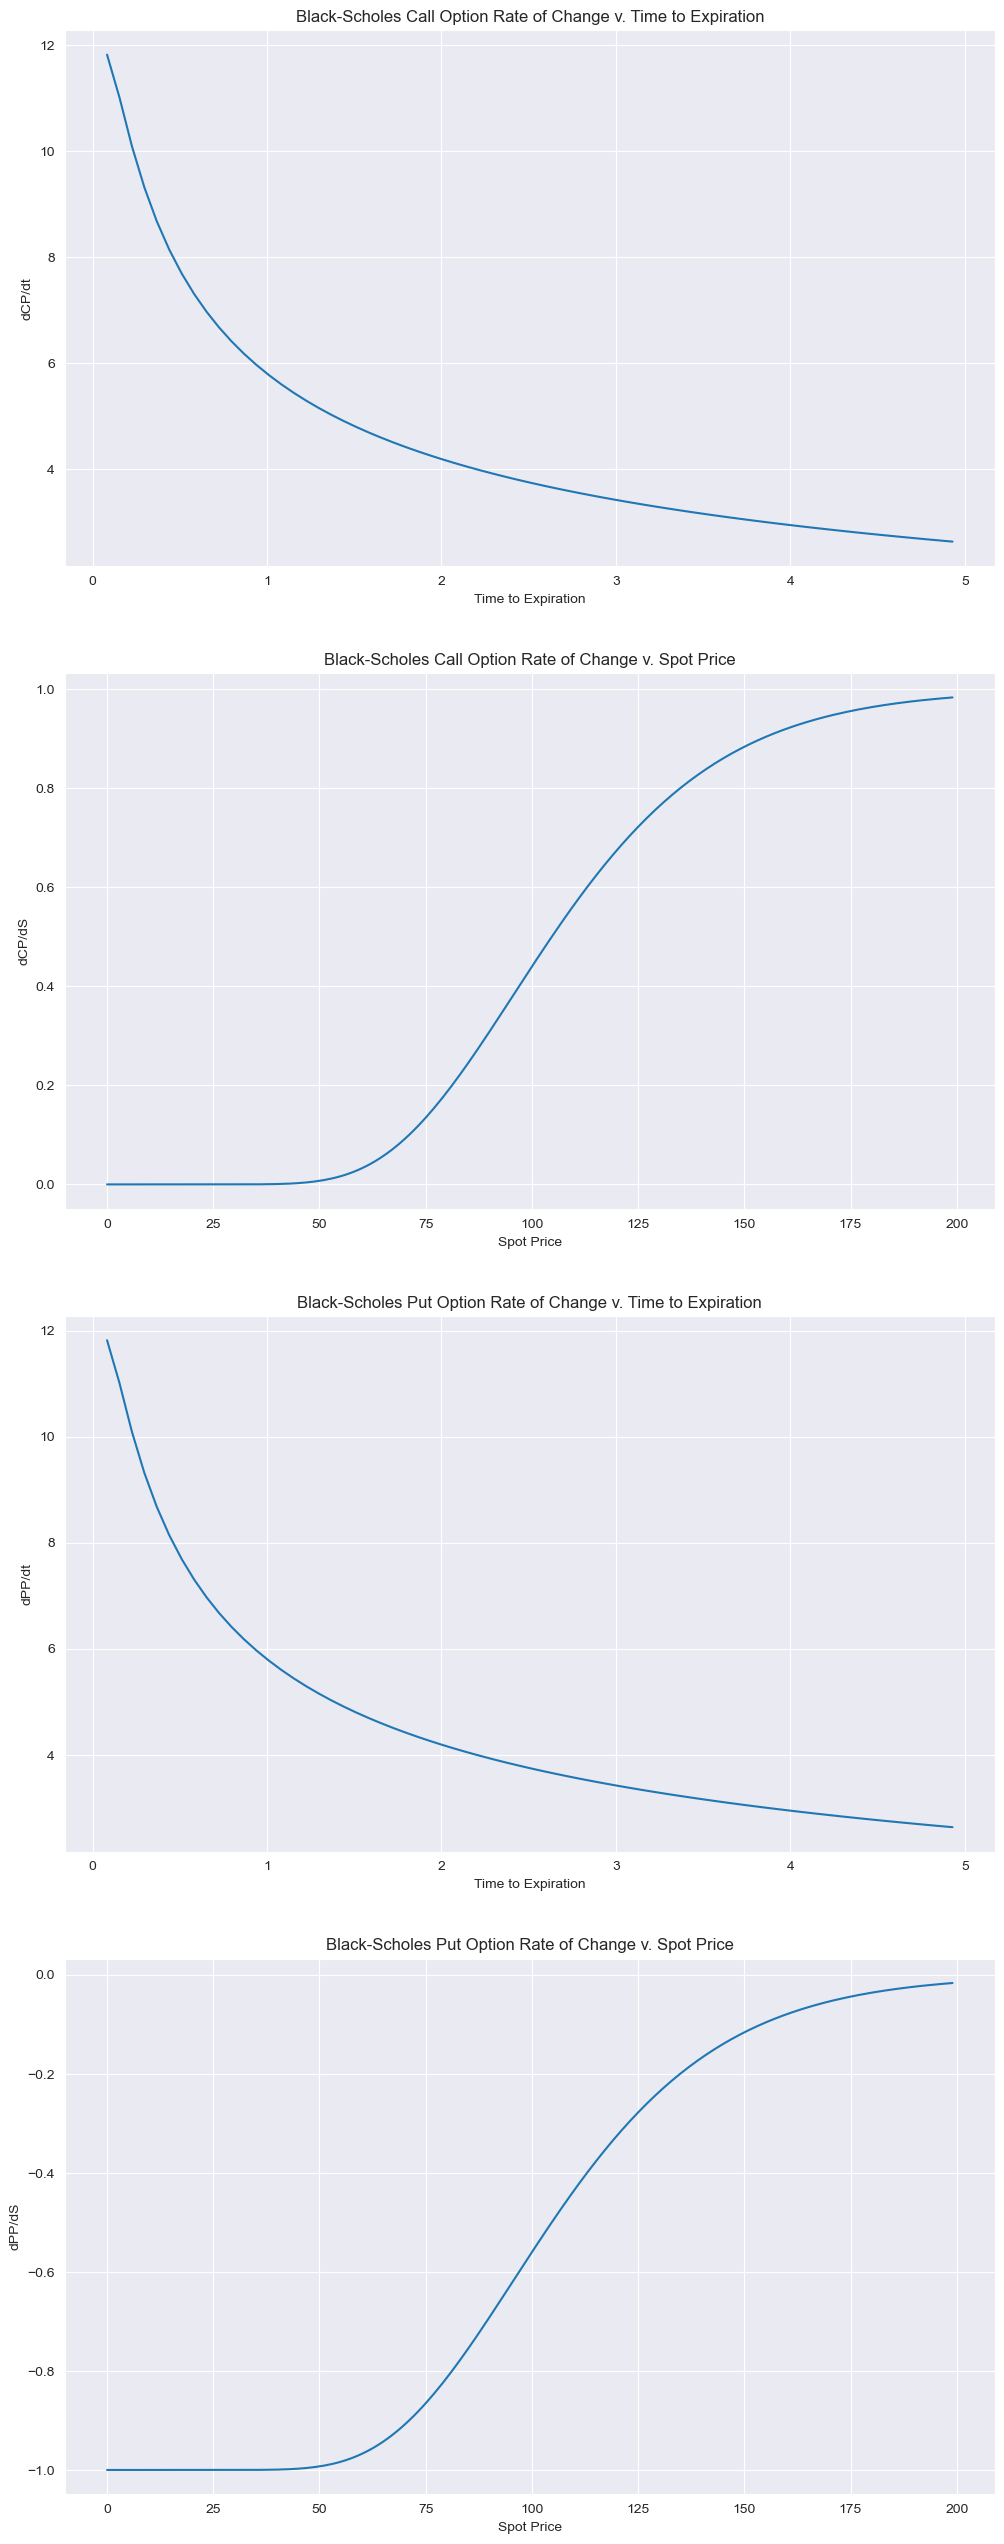

In [ ]:
S0 = 100
S0s = np.linspace(0, 200, 201)
K = 110
sigma = .3
times = np.linspace(1/12, 5, 70)
time = 1

call_prices_t = [bs_call(S0,K,sigma, t = times[i]) for i in range(len(times))]
call_prices_s = [bs_call(S0=S0s[i],K=K,sigma=sigma,t=time) for i in range(len(S0s))]
put_prices_t = [bs_put(S0,K,sigma, t = times[i]) for i in range(len(times))]
put_prices_s = [bs_put(S0=S0s[i],K=K,sigma=sigma,t=time) for i in range(len(S0s))]

RoC_ct = np.diff(call_prices_t)/np.diff(times)
RoC_cs = np.diff(call_prices_s)/np.diff(S0s)
RoC_pt = np.diff(put_prices_t)/np.diff(times)
RoC_ps = np.diff(put_prices_s)/np.diff(S0s)

fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(12, 32))

ax[0].set_title('Black-Scholes Call Option Rate of Change v. Time to Expiration')
ax[0].plot(times[:-1], RoC_ct)
ax[0].set_ylabel('dCP/dt')
ax[0].set_xlabel('Time to Expiration')

ax[1].set_title('Black-Scholes Call Option Rate of Change v. Spot Price')
ax[1].plot(S0s[:-1], RoC_cs)
ax[1].set_ylabel('dCP/dS')
ax[1].set_xlabel('Spot Price')

ax[2].set_title('Black-Scholes Put Option Rate of Change v. Time to Expiration')
ax[2].plot(times[:-1], RoC_pt)
ax[2].set_ylabel('dPP/dt')
ax[2].set_xlabel('Time to Expiration')

ax[3].set_title('Black-Scholes Put Option Rate of Change v. Spot Price')
ax[3].plot(S0s[:-1], RoC_ps)
ax[3].set_ylabel('dPP/dS')
ax[3].set_xlabel('Spot Price')

plt.show()

## Combination Plot and Analysis

Below I plot a combination of the above plots, with both the call and put price and the rate of change as they vary with time to expiration and spot price.

C:\Users\ntamm\AppData\Local\Temp\ipykernel_27612\3182136271.py:17: RuntimeWarning: divide by zero encountered in log
  d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
C:\Users\ntamm\AppData\Local\Temp\ipykernel_27612\3182136271.py:40: RuntimeWarning: divide by zero encountered in log
  d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))


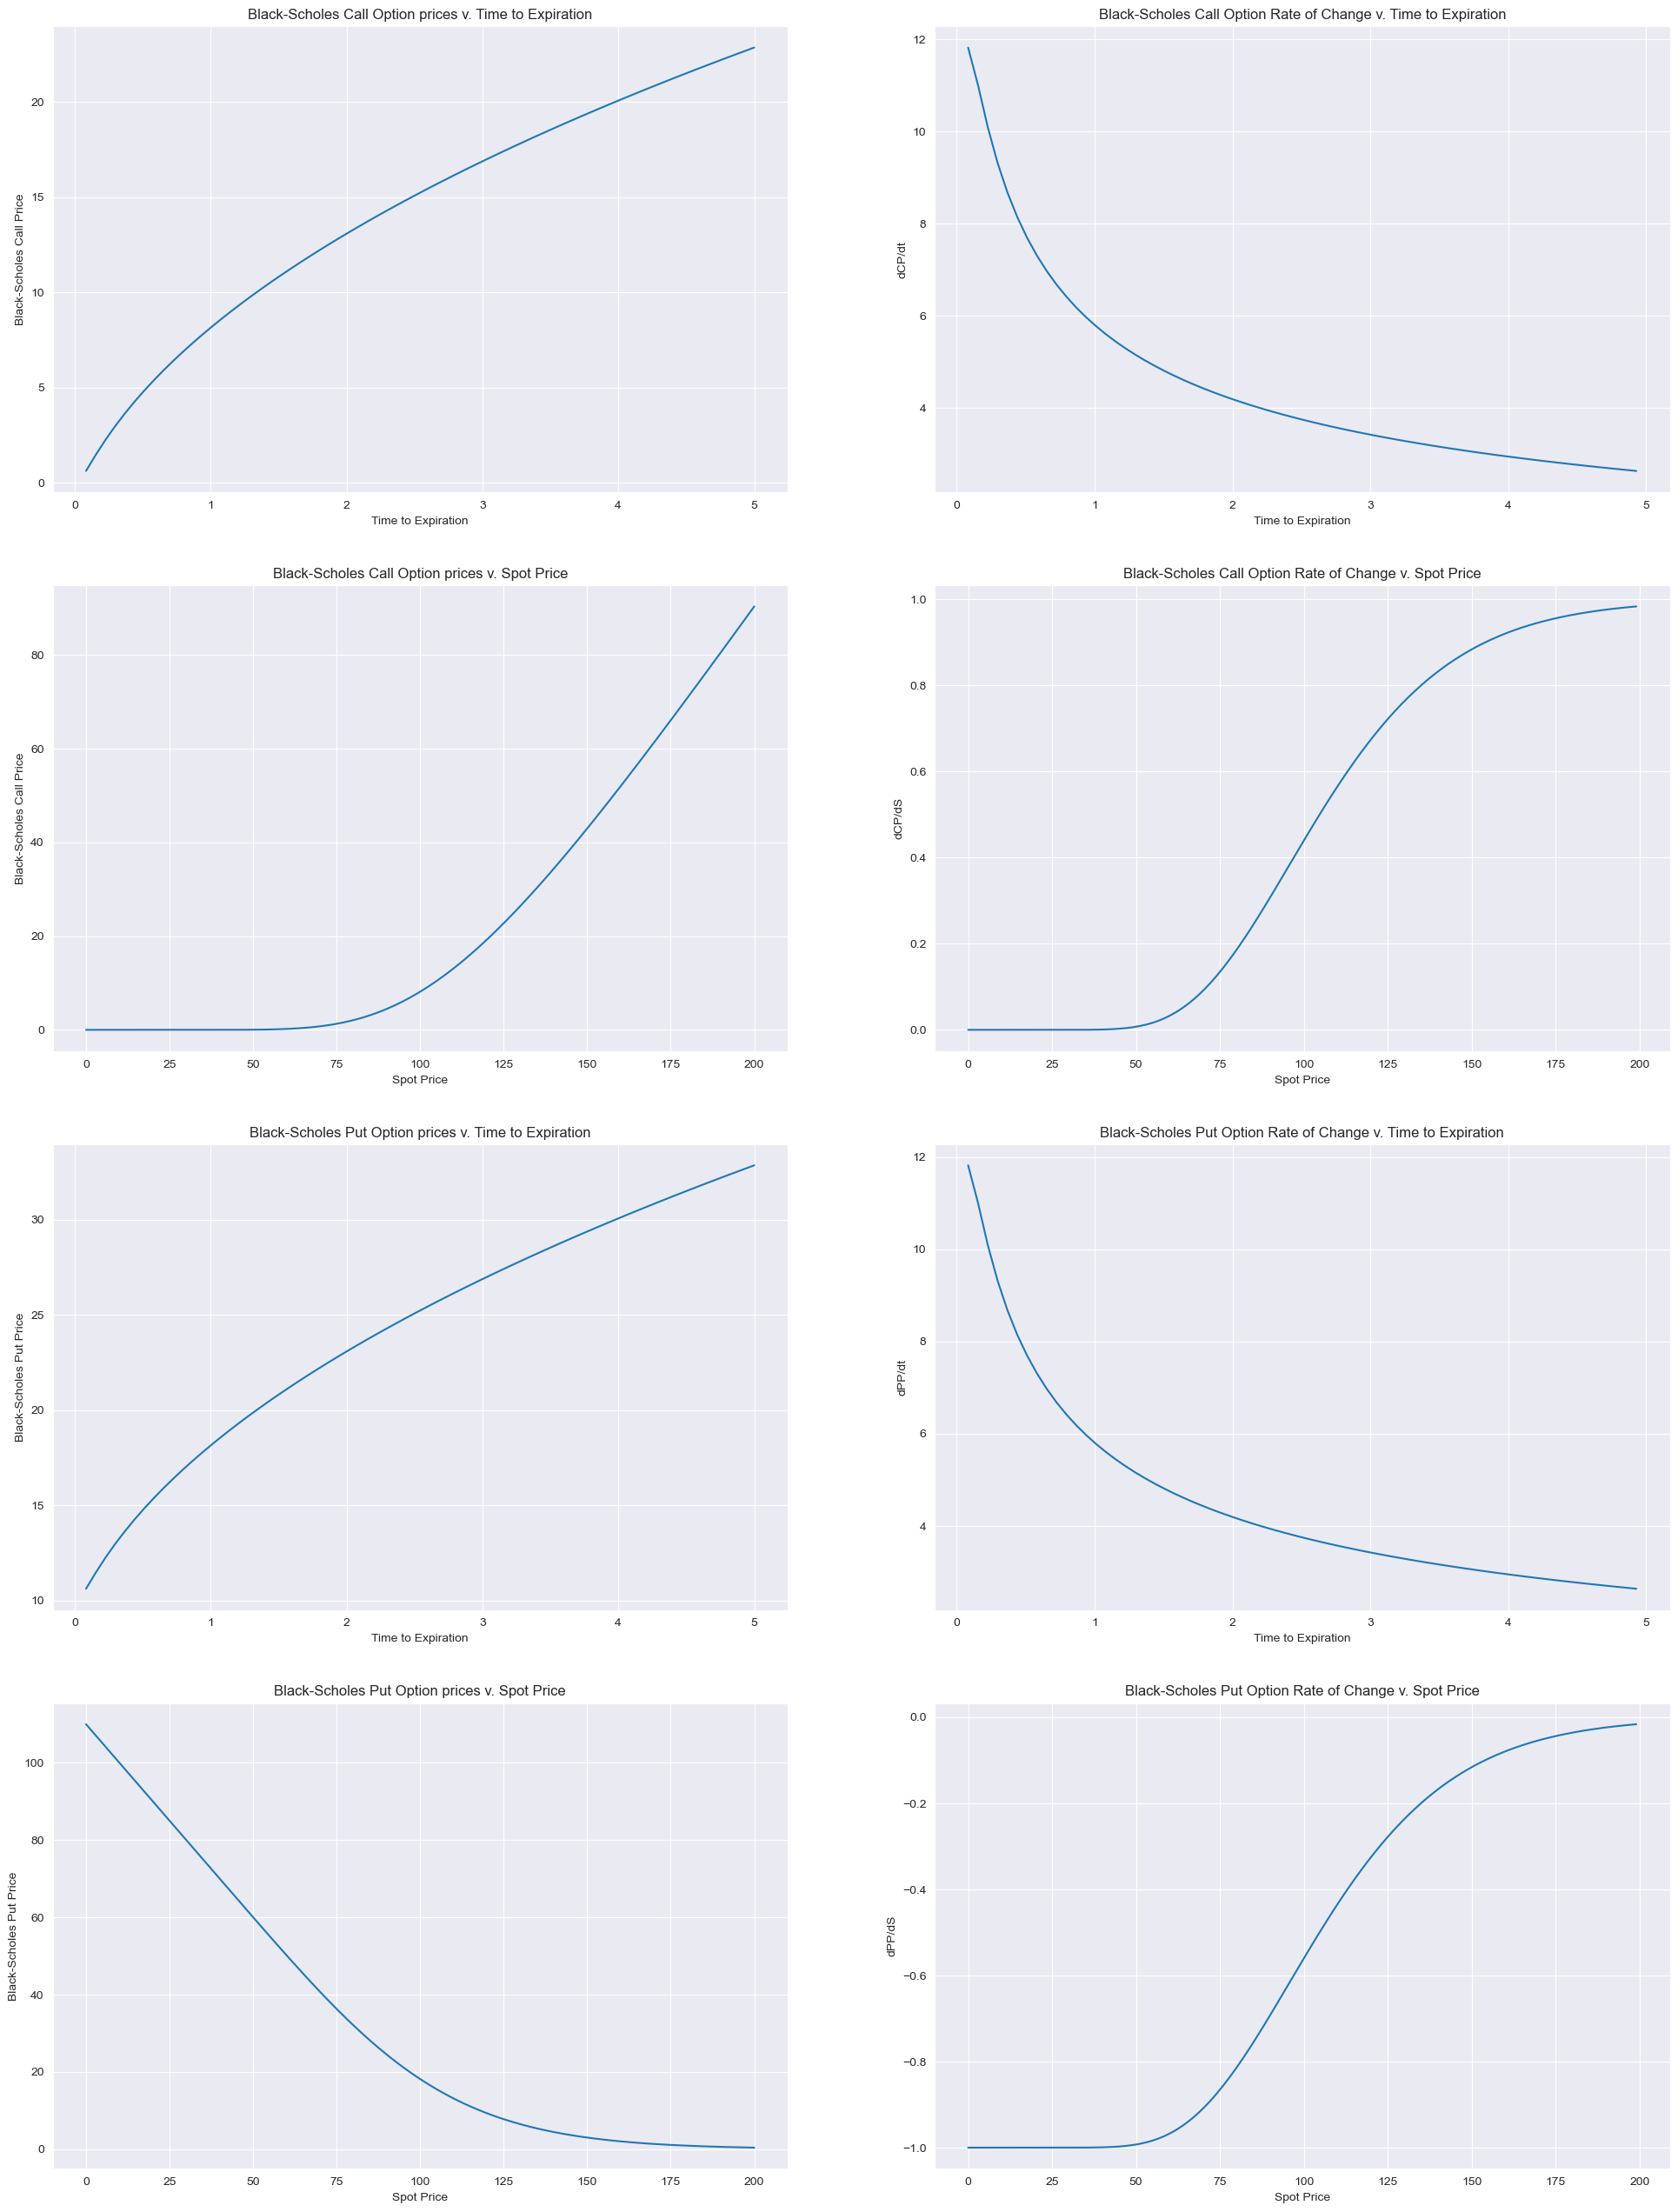

In [40]:
S0 = 100
S0s = np.linspace(0, 200, 201)
K = 110
sigma = .3
times = np.linspace(1/12, 5, 70)
time = 1

call_prices_t = [bs_call(S0,K,sigma, t = times[i]) for i in range(len(times))]
call_prices_s = [bs_call(S0=S0s[i],K=K,sigma=sigma,t=time) for i in range(len(S0s))]
put_prices_t = [bs_put(S0,K,sigma, t = times[i]) for i in range(len(times))]
put_prices_s = [bs_put(S0=S0s[i],K=K,sigma=sigma,t=time) for i in range(len(S0s))]

RoC_ct = np.diff(call_prices_t)/np.diff(times)
RoC_cs = np.diff(call_prices_s)/np.diff(S0s)
RoC_pt = np.diff(put_prices_t)/np.diff(times)
RoC_ps = np.diff(put_prices_s)/np.diff(S0s)

fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(24, 32))

ax[0,0].set_title('Black-Scholes Call Option prices v. Time to Expiration')
ax[0,0].plot(times, call_prices_t)
ax[0,0].set_ylabel('Black-Scholes Call Price')
ax[0,0].set_xlabel('Time to Expiration')

ax[1,0].set_title('Black-Scholes Call Option prices v. Spot Price')
ax[1,0].plot(S0s, call_prices_s)
ax[1,0].set_ylabel('Black-Scholes Call Price')
ax[1,0].set_xlabel('Spot Price')

ax[2,0].set_title('Black-Scholes Put Option prices v. Time to Expiration')
ax[2,0].plot(times, put_prices_t)
ax[2,0].set_ylabel('Black-Scholes Put Price')
ax[2,0].set_xlabel('Time to Expiration')

ax[3,0].set_title('Black-Scholes Put Option prices v. Spot Price')
ax[3,0].plot(S0s, put_prices_s)
ax[3,0].set_ylabel('Black-Scholes Put Price')
ax[3,0].set_xlabel('Spot Price')



ax[0,1].set_title('Black-Scholes Call Option Rate of Change v. Time to Expiration')
ax[0,1].plot(times[:-1], RoC_ct)
ax[0,1].set_ylabel('dCP/dt')
ax[0,1].set_xlabel('Time to Expiration')

ax[1,1].set_title('Black-Scholes Call Option Rate of Change v. Spot Price')
ax[1,1].plot(S0s[:-1], RoC_cs)
ax[1,1].set_ylabel('dCP/dS')
ax[1,1].set_xlabel('Spot Price')

ax[2,1].set_title('Black-Scholes Put Option Rate of Change v. Time to Expiration')
ax[2,1].plot(times[:-1], RoC_pt)
ax[2,1].set_ylabel('dPP/dt')
ax[2,1].set_xlabel('Time to Expiration')

ax[3,1].set_title('Black-Scholes Put Option Rate of Change v. Spot Price')
ax[3,1].plot(S0s[:-1], RoC_ps)
ax[3,1].set_ylabel('dPP/dS')
ax[3,1].set_xlabel('Spot Price')

plt.show()

Call Option v. Time to Expiration:

Looking at the first row, we see the call option price and rate of change with respect to a varying time to expiration. The call price increases with the time to expiration. However, we see that the rate of change of the price decreases as the time increases. Initially, the call price changes rapidly when t<1 year, but slows as t goes past the 1 year mark.

Call Option v. Spot Price:

The call price does not increase much when the spot price is low. However, when the spot price starts to approach the strike price, the call price starts to increase. We see from the rate of change graph that the spot price's rate of change is essentially 0 until it starts to increase around K/2 and asymtotically approaches a rate of change of 1, so every increase in the spot price is almost matched by an incease in the c


Put Option v. Time to Expiration:

The put option price and price rate of change with respect to variable time to expiration follow the same pattern as the call option. The put price increases while the rate of change decreases with increasing time to expiration.

Put Option v. Spot Price:

The put option price and rate of change with respect to spot price is opposite of the call option. The put option price starts high when the spot price is low, then decreases  until it asymtotically approaches 0. The rate of change starts at -1 before transitioning to approach 0.